In [1]:
# fastai推荐使用这种方式引入所有的包
from fastai.vision.all import *

In [2]:
# 下载数据集, 路径暂时未知
path = untar_data(URLs.PETS)/'images'
path

Path('C:/Users/11954/.fastai/data/oxford-iiit-pet/images')

In [3]:
# 该数据集中的每个图片为动物的细分种类和编号,如:"Abyssinian_160.jpg"
# 若该图片为猫, 首字母大写
def is_cat(x): return x[0].isupper()

In [4]:
# path为数据集地址
# valid_pct为验证集大小
# seed为验证集划分的种子, 若固定种子, 则每次划分的验证集相同
# label_func确定该样本的标签
# item_tfms针对每个样本, 若选择batch_tfms则会针对每个batch
# Resize将每个图片resize为244像素的方块, 兼容老模型
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(244))

In [5]:
# 使用resnet模型进行迁移学习
# resnet34表示该模型有34层
# resnet还包括18 50 101 152层的模型
# 层数越多, 训练时间越长, 若数据较少也较统一过拟合
# 若下载失败, 可手动下载模型, 并放在"C:\Users\11954\.cache\torch\hub\checkpoints"路径下
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [6]:
# fit表示全部训练所有的权重
# fine_tune仅对已训练模型做微调
# 微调时, 仅修改模型的头部使其适应某个具体的任务(头部head指靠近输出的层, 底部base指靠近输入的层,用于特征提取)

# 微调时, 第一个epoch修改模型, 使其能够输出预期的结果
# 之后根据输入的参数(本例为1), 修改权重, 越靠近head的权重更新越快, 越靠近base的权重更新越慢
# 尽可能保留预训练模型的特性
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.170193,0.017993,0.004736,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.046947,0.060011,0.014885,00:44
1,0.040120,0.006628,0.002706,00:44
2,0.020529,0.012618,0.003383,00:44


# 注意, 可以使用某种transformer将非图像的数据, 如时序数据, 转换为图像数据, 并基于cnn, 完成任务

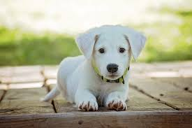

In [16]:
img = PILImage.create('dog.jpg')
img.to_thumb(192)

In [17]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000046
